In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 28 15:34:07 2020

@author: ecen
"""


import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas import DataFrame
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

Using TensorFlow backend.


In [4]:
Data = pd.read_csv('Data_Processing.csv')

In [22]:
Data['Messages'].count()

248069

In [27]:
pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',800)

In [28]:
Data

Unnamed: 0            Time  bit1  bit2  bit3  bit4  ...  bit61  bit62  \
0                0         (0, 17]     0     0     0     0  ...      1      1   
1                1         (0, 17]     0     0     0     0  ...      1      1   
2                2         (0, 17]     1     1     0     0  ...      0      0   
3                3         (0, 17]     0     0     0     0  ...      1      1   
4                4         (0, 17]     0     0     0     0  ...      1      1   
...            ...             ...   ...   ...   ...   ...  ...    ...    ...   
248064      248064  (12274, 12291]     1     1     0     0  ...      1      1   
248065      248065  (12274, 12291]     1     1     0     0  ...      1      1   
248066      248066  (12274, 12291]     1     1     0     0  ...      1      0   
248067      248067  (12308, 12325]     1     1     0     0  ...      1      0   
248068      248068  (12308, 12325]     1     1     0     0  ...      1      1   

        bit63  bit64     Protocol       Messages  
0           0      0  BACnet-APDU  Read-Property  
1           0      0  BACnet-APDU  Read-Property  
2           0      1          ARP           Tell  
3           0      0  BACnet-APDU  Read-Property  
4           0      1  BACnet-APDU  Read-Property  
...       ...    ...          ...            ...  
248064      1      0          ARP             At  
248065      1      0          ARP           Tell  
248066      1      0          ARP             At  
248067      1      0          ARP           Tell  
248068      1      0          ARP             At  

[248069 rows x 68 columns]

In [33]:
Data.iloc[:,-1]

0         Read-Property
1         Read-Property
2                  Tell
3         Read-Property
4         Read-Property
              ...      
248064               At
248065             Tell
248066               At
248067             Tell
248068               At
Name: Messages, Length: 248069, dtype: object

##### init_n = # of times with different centroid seeds 

In [8]:
def ElbowMethod(n, init_method,init_n,data):
    # Finding the best number of clusters by obtaining cost (elbow method)
    cost = []
    for num_clusters in list(range(1,n+1)):
        kmode = KModes(n_clusters=num_clusters, init = init_method , n_init = init_n, verbose=1)
        kmode.fit_predict(data)
        cost.append(kmode.cost_)

    y = np.array([i for i in range(1,n+1,1)])
    return y,cost

In [16]:
def makeClusters(Data, num_clusters,max_iter_no, init_method, init_no, random_state_no):
    
    km_cao = KModes(n_clusters= num_clusters, max_iter = max_iter_no, init = init_method, n_init = init_no, 
                    verbose=1, random_state=random_state_no)
    data = Data.values # or Finalized Data not sure?
    fitClusters_cao = km_cao.fit_predict(data)
    
    clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
    clusForInfo = clusterCentroidsDf.copy()
    clusterInfo = clusForInfo
    clusterInfo.columns = Data.columns #clusterInfo shows the cluster information 

    # Concatenating the data for visualization 
    clustersDf = pd.DataFrame(fitClusters_cao)
    clustersDf.columns = ['cluster_predicted']
    combinedDf = pd.concat([Data, clustersDf], axis = 1).reset_index()

    return clusterInfo, clusterCentroidsDf, combinedDf, fitClusters_cao

In [12]:
y,cost = ElbowMethod(n = 8,init_method = 'Cao',init_n = 2,data = Data)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2422751.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1778039.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8232, cost: 1408300.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8378, cost: 1371509.0
Run 1, iteration: 2/100, moves: 0, cost: 1371509.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: init

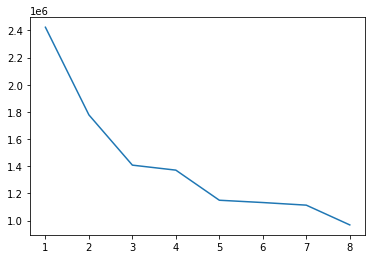

In [14]:
plt.plot(y,cost)


In [8]:
Data_new = pd.read_csv('Data_Processing.csv')

In [9]:
file_Messages = pd.get_dummies(Data_new[['Messages']])

In [10]:
file_Protocol = pd.get_dummies(Data_new[['Protocol']])

In [11]:
Data_new = Data_new.iloc[:,2:66]

In [12]:
Finalized_Data = pd.concat([Data_new, file_Protocol,file_Messages], axis=1)

In [13]:
Finalized_Data

bit1  bit2  bit3  bit4  bit5  bit6  bit7  bit8  bit9  bit10  ...  \
0          0     0     0     0     1     0     1     0     0      0  ...   
1          0     0     0     0     1     0     1     0     0      0  ...   
2          1     1     0     0     0     0     0     0     1      0  ...   
3          0     0     0     0     1     0     1     0     0      0  ...   
4          0     0     0     0     1     0     1     0     0      0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
248064     1     1     0     0     0     0     0     0     1      0  ...   
248065     1     1     0     0     0     0     0     0     1      0  ...   
248066     1     1     0     0     0     0     0     0     1      0  ...   
248067     1     1     0     0     0     0     0     0     1      0  ...   
248068     1     1     0     0     0     0     0     0     1      0  ...   

        Protocol_BACnet-NPDU  Messages_Ack-Message  Messages_At  \
0                          0                     0            0   
1                          0                     0            0   
2                          0                     0            0   
3                          0                     0            0   
4                          0                     0            0   
...                      ...                   ...          ...   
248064                     0                     0            1   
248065                     0                     0            0   
248066                     0                     0            1   
248067                     0                     0            0   
248068                     0                     0            1   

        Messages_I-Am  Messages_Read-Property  Messages_Tell  \
0                   0                       1              0   
1                   0                       1              0   
2                   0                       0              1   
3                   0                       1              0   
4                   0                       1              0   
...               ...                     ...            ...   
248064              0                       0              0   
248065              0                       0              1   
248066              0                       0              0   
248067              0                       0              1   
248068              0                       0              0   

        Messages_Unconfirmed-Transfer  Messages_Who-Is  Messages_Who-Router  \
0                                   0                0                    0   
1                                   0                0                    0   
2                                   0                0                    0   
3                                   0                0                    0   
4                                   0                0                    0   
...                               ...              ...                  ...   
248064                              0                0                    0   
248065                              0                0                    0   
248066                              0                0                    0   
248067                              0                0                    0   
248068                              0                0                    0   

        Messages_Write-Property  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
248064                        0  
248065                        0  
248066                        0  
248067                        0  
248068                        0  

[248069 rows x 76 columns]

In [21]:
Finalized_Data['Messages_Tell'].value_counts()

0    233493
1     14576
Name: Messages_Tell, dtype: int64

In [23]:
x = 14576/248069

In [24]:
x

0.058757845599409844

In [25]:
y = 233493/248069
y

0.9412421544005901

In [26]:
1/20

0.05

In [3]:
freq_17 = pd.read_csv('FrequencyTable_17.csv')

In [7]:
freq_17.iloc[:,1:]


Ack-Message  At  I-am  Read-Property  Tell  Unconfirmed-Transfer  Who-Is  \
0             20  23    14            333    30                    42      20   
1             20  21     0            319    28                    42      13   
2             20  22     7            327    27                    49      19   
3             20  29     7            323    30                    49      20   
4             25  21     0            342    21                    35      13   
..           ...  ..   ...            ...   ...                   ...     ...   
647            0   4     0              0     4                     0       0   
648            0   8     0              0     8                     0       0   
649            0   0     1              0     0                     0       0   
650            0   2     0              0     2                     0       0   
651            0   1     0              0     1                     0       0   

     Who-Router  Write-Property  
0            47               6  
1            78               8  
2            41             315  
3            71               6  
4            41               6  
..          ...             ...  
647           0               0  
648           0               0  
649           0               0  
650           0               0  
651           0               0  

[652 rows x 9 columns]

In [18]:
x = Finalized_Data.values

In [17]:
clusterInfo_14, clusterCentroidsDf_14, combinedDf_14, fitClusters_cao_14 = makeClusters(Data = Finalized_Data,
                                                                                        max_iter_no = 100,
                                                                                        num_clusters = 14,
                                                                                        init_method = 'Cao',
                                                                                        init_no = 1,
                                                                                        random_state_no = 22)
                                                                                        

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 65285, cost: 713234.0
Run 1, iteration: 2/100, moves: 10205, cost: 707831.0
Run 1, iteration: 3/100, moves: 275, cost: 707831.0


In [20]:
clusterInfo_14

bit1  bit2  bit3  bit4  bit5  bit6  bit7  bit8  bit9  bit10  bit11  bit12  \
0      0     0     0     0     1     0     1     0     0      0      0      1   
1      1     1     0     0     0     0     0     0     1      0      1      0   
2      0     0     0     0     1     0     1     0     0      0      1      0   
3      1     1     0     0     0     0     0     0     1      0      1      0   
4      0     0     0     0     1     0     1     0     0      0      0      1   
5      1     1     0     0     0     0     0     0     1      0      1      0   
6      0     0     0     0     1     0     1     0     0      0      0      1   
7      0     0     0     0     1     0     1     0     0      0      0      1   
8      0     0     0     0     1     0     1     0     0      0      0      1   
9      1     1     0     0     0     0     0     0     1      0      1      0   
10     0     0     0     0     1     0     1     0     0      0      0      1   
11     0     0     0     0     1     0     1     0     0      0      0      0   
12     0     0     0     0     1     0     1     0     0      0      0      1   
13     1     1     0     0     0     0     0     0     1      0      1      0   

    bit13  bit14  bit15  bit16  bit17  bit18  bit19  bit20  bit21  bit22  \
0       1      1      1      0      0      0      0      0      1      0   
1       1      0      0      0      0      0      0      0      0      0   
2       1      0      0      0      0      0      0      0      1      0   
3       1      0      0      0      0      0      0      0      0      0   
4       1      1      1      0      0      0      0      0      1      0   
5       1      0      0      0      0      0      0      0      0      0   
6       1      1      1      0      0      0      0      0      1      0   
7       1      1      1      0      0      0      0      0      1      0   
8       1      1      1      0      0      0      0      0      1      0   
9       1      0      0      0      0      0      0      0      0      0   
10      1      1      1      0      0      0      0      0      1      0   
11      1      0      1      0      0      0      0      0      1      0   
12      1      1      1      0      0      0      0      0      1      0   
13      1      0      0      0      0      0      0      0      0      0   

    bit23  bit24  bit25  bit26  bit27  bit28  bit29  bit30  bit31  bit32  \
0       1      0      0      0      0      0      1      1      0      0   
1       0      1      0      0      1      0      0      0      0      1   
2       1      0      0      0      0      1      0      1      1      1   
3       0      1      0      0      1      1      0      1      1      1   
4       1      0      0      0      0      0      1      1      0      0   
5       0      1      0      0      0      1      1      1      0      1   
6       1      0      0      0      0      0      1      1      0      0   
7       1      0      0      0      0      0      1      1      0      0   
8       1      0      0      0      1      1      0      1      1      1   
9       0      1      0      0      1      0      1      1      1      0   
10      1      0      0      0      0      0      1      1      0      0   
11      1      0      0      0      1      1      1      1      0      0   
12      1      0      0      0      0      0      1      1      0      0   
13      0      1      0      0      0      1      1      1      1      0   

    bit33  bit34  bit35  bit36  bit37  bit38  bit39  bit40  bit41  bit42  \
0       0      0      0      0      1      0      1      0      0      0   
1       1      1      0      0      0      0      0      0      1      0   
2       0      0      0      0      1      0      1      0      0      0   
3       0      0      0      0      0      0      0      1      0      0   
4       0      0      0      0      1      0      1      0      0      0   
5       1      1      0      0      0      0      

In [21]:
clusterInfo_14.to_csv('clusterInfo_14.csv')

In [18]:
cluster14 = pd.read_csv('clusterInfo_14.csv')
cluster14.iloc[:,1:77]

bit1  bit2  bit3  bit4  bit5  bit6  ...  Messages_Read-Property  \
0      0     0     0     0     1     0  ...                       1   
1      1     1     0     0     0     0  ...                       0   
2      0     0     0     0     1     0  ...                       1   
3      1     1     0     0     0     0  ...                       0   
4      0     0     0     0     1     0  ...                       1   
5      1     1     0     0     0     0  ...                       0   
6      0     0     0     0     1     0  ...                       0   
7      0     0     0     0     1     0  ...                       0   
8      0     0     0     0     1     0  ...                       1   
9      1     1     0     0     0     0  ...                       0   
10     0     0     0     0     1     0  ...                       1   
11     0     0     0     0     1     0  ...                       1   
12     0     0     0     0     1     0  ...                       0   
13     1     1     0     0     0     0  ...                       0   

    Messages_Tell  Messages_Unconfirmed-Transfer  Messages_Who-Is  \
0               0                              0                0   
1               1                              0                0   
2               0                              0                0   
3               1                              0                0   
4               0                              0                0   
5               0                              0                0   
6               0                              0                0   
7               0                              1                0   
8               0                              0                0   
9               0                              0                0   
10              0                              0                0   
11              0                              0                0   
12              0                              0                0   
13              0                              0                0   

    Messages_Who-Router  Messages_Write-Property  
0                     0                        0  
1                     0                        0  
2                     0                        0  
3                     0                        0  
4                     0                        0  
5                     0                        0  
6                     1                        0  
7                     0                        0  
8                     0                        0  
9                     0                        0  
10                    0                        0  
11                    0                        0  
12                    0                        0  
13                    0                        0  

[14 rows x 76 columns]

In [21]:
clusterer

KModes(cat_dissim=<function matching_dissim at 0x0000020D7534ABF8>, init='Cao',
       max_iter=100, n_clusters=2, n_init=1, n_jobs=1, random_state=10,
       verbose=0)

In [24]:
clusterer.cluster_centroids_.shape

(2, 76)

For n_clusters = 2 The average silhouette_score is : 0.47021736725083185


AttributeError: 'KModes' object has no attribute 'cluster_centers_'

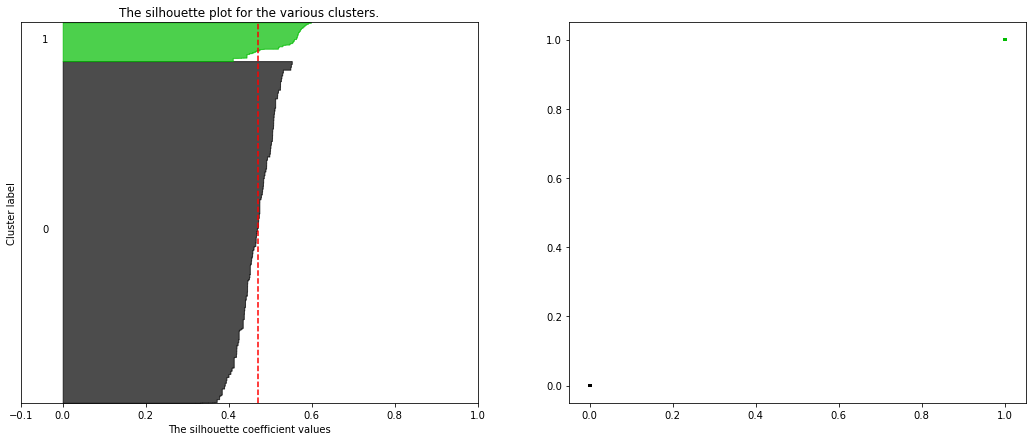

In [20]:
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters,init = 'Cao',random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [22]:
y_mod2,cost_mod2 = ElbowMethod(n = 8,init_method = 'Cao',init_n = 2,data = Data)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2422751.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1778039.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8232, cost: 1408300.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8378, cost: 1371509.0
Run 1, iteration: 2/100, moves: 0, cost: 1371509.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: init

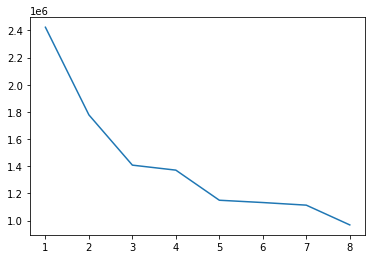

In [23]:
plt.plot(y_mod2,cost_mod2)

In [47]:
clusterInfo_5, clusterCentroidsDf_5, combinedDf_5, fitClusters_cao_5 = makeClusters(Data = Data, num_clusters = 5,max_iter =100, 
                                                                                    init_method = 'Cao' , 
                                                                                    init_no = 1, random_state_no = 22)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14213, cost: 1150088.0
Run 1, iteration: 2/100, moves: 0, cost: 1150088.0


In [48]:
clusterInfo_5

Time bit1 bit2 bit3 bit4 bit5 bit6 bit7 bit8 bit9 bit10 bit11  \
0  (7837, 7854]    0    0    0    0    1    0    1    0    0     0     0   
1  (6273, 6290]    1    1    0    0    0    0    0    0    1     0     1   
2  (4216, 4233]    0    0    0    0    1    0    1    0    0     0     1   
3  (6239, 6256]    1    1    0    0    0    0    0    0    1     0     1   
4  (4216, 4233]    0    0    0    0    1    0    1    0    0     0     0   

  bit12 bit13 bit14 bit15 bit16 bit17 bit18 bit19 bit20 bit21 bit22 bit23  \
0     1     1     1     1     0     0     0     0     0     1     0     1   
1     0     1     0     0     0     0     0     0     0     0     0     0   
2     0     1     0     0     0     0     0     0     0     1     0     1   
3     0     1     0     0     0     0     0     0     0     0     0     0   
4     1     1     1     1     0     0     0     0     0     1     0     1   

  bit24 bit25 bit26 bit27 bit28 bit29 bit30 bit31 bit32 bit33 bit34 bit35  \
0     0     0     0     0     0     1     1     0     0     0     0     0   
1     1     0     0     1     0     0     0     0     1     1     1     0   
2     0     0     0     0     1     0     1     1     1     0     0     0   
3     1     0     0     1     1     0     1     1     1     0     0     0   
4     0     0     0     0     0     1     1     0     0     0     0     0   

  bit36 bit37 bit38 bit39 bit40 bit41 bit42 bit43 bit44 bit45 bit46 bit47  \
0     0     1     0     1     0     0     0     0     1     1     1     1   
1     0     0     0     0     0     1     0     1     0     1     0     0   
2     0     1     0     1     0     0     0     0     1     1     1     1   
3     0     0     0     0     1     0     0     0     0     0     0     0   
4     0     1     0     1     0     0     0     1     0     1     0     0   

  bit48 bit49 bit50 bit51 bit52 bit53 bit54 bit55 bit56 bit57 bit58 bit59  \
0     0     0     0     0     0     1     0     1     0     0     0     1   
1     0     0     0     0     0     0     0     0     1     0     0     1   
2     0     0     0     0     0     1     0     1     0     0     0     0   
3     1     0     0     0     0     0     0     0     1     0     0     0   
4     0     0     0     0     0     1     0     1     0     0     0     1   

  bit60 bit61 bit62 bit63 bit64  
0     1     1     1     1     1  
1     0     0     0     0     1  
2     0     1     1     0     0  
3     0     0     0     0     1  
4     1     1     1     1     1

In [26]:
clusterInfo_5n, clusterCentroidsDf_5n, combinedDf_5n, fitClusters_cao_5n = makeClusters(Finalized_Data, num_clusters = 5,max_iter =100, 
                                                                                    init_method = 'Cao' , 
                                                                                    init_no = 1, random_state_no = 22)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33000, cost: 1361602.0
Run 1, iteration: 2/100, moves: 0, cost: 1361602.0


In [30]:
clusterInfo_5n.to_csv('clusterInfo.csv')

In [49]:
clusterInfo_5.to_csv('clusterInfoOnly_IPs.csv')

In [23]:
type(clusterInfo_14)

pandas.core.frame.DataFrame

In [28]:
from scipy.spatial import distance

In [ ]:
dissimi = []

In [47]:
val = clusterInfo_14.loc[1]
val.to_numpy(dtype=object)
# np.reshape(val, [1,76])
print(val.shape)
x = val.values
x_re = np.reshape(x,[1,76])
print(type(val), type(x))
    

(76,)
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [48]:
x_re

array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [49]:
val_cmp = clusterInfo_14.loc[2] 
y = val_cmp.values
y_re = np.reshape(y,[1,76])

In [50]:
non_match = distance.jaccard([y_re],[x_re])

In [51]:
non_match

0.8888888888888888

In [52]:
non_match_ha = distance.hamming([y_re],[x_re])

In [53]:
non_match_ha

0.42105263157894735

In [57]:
#  Kulsinski dissimilarity 
non_match_ku = distance.kulsinski([y_re],[x_re])
non_match_ku

0.9629629629629629

In [1]:
inputs = ['10.01.01.34', '9.596.4.395','hkwhfksdh','wdsisdh']

In [23]:
check_source = [y.isdigit() for y in x[0]]

In [24]:
check_source

[True, True, True, True]